downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/ajaysr/scikit_learn_data
Dataset consists of 400 faces


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


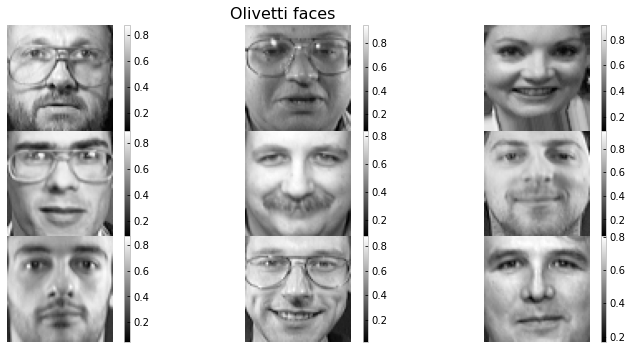

In [38]:
from sklearn.datasets import fetch_olivetti_faces

n_row, n_col = 3, 3
image_shape = (64, 64)

# Load faces 
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
labels = dataset.target
n_samples, n_features = faces.shape

print('Dataset consists of %d faces' % n_samples)

#Define function to plot exampes
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(10,5))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape((64,64))
        plt.imshow(comp,cmap='gray')
        plt.colorbar(); plt.axis('off');
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
plot_gallery("Olivetti faces", faces[:9,:])

**The dataset is stored in ```faces```:**

In [39]:
faces.shape

(400, 4096)

**This is the input matrix of size $N\times D$, where $N=400$ is the number of images and $D=4096$ is the dimensionality of each image (in the pixel space, each image can be reshaped to a $64\times 64$ image).**

**There are 10 samples for each class, and a total of 40 classes (each class is a different person).**

**For example, label 3:**

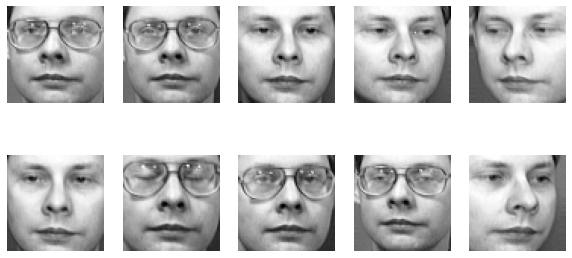

In [40]:
plt.figure(figsize=(10,5))
idx = np.where(labels==3)[0]
for i in range(len(idx)):
    plt.subplot(2,5,i+1)
    plt.imshow(faces[idx[i],:].reshape((64,64)),cmap='gray')
    plt.axis('off');

1. **Partition the data into 80% training and 20% test.**

In [41]:
faces_train, faces_test, label_train, label_test = train_test_split(faces, labels, test_size=0.20, random_state=100)

2. **Using PCA to project the data into a 9-dimensional space. Plotting the correspondent 9 eigenvectors (*Principal Components* or PCs) for the training set. Describing what these 9 PCs represent. (For image datasets, the principal components are also referred to *eigenfaces*)**
    * **The function "plot_gallery" may be useful for this.**

In [42]:
# From plot_gallery function - sklearn

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(
            comp.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)

In [43]:
from sklearn.decomposition import PCA

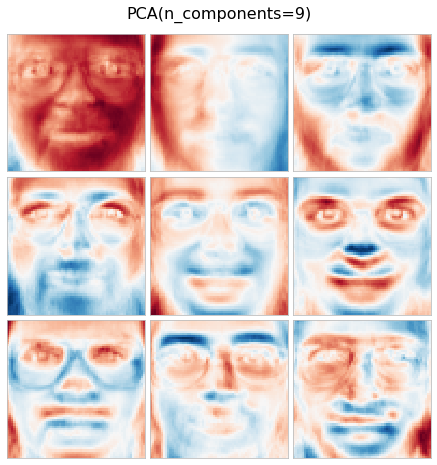

In [44]:
pca = PCA(n_components=9).fit(faces_train)
components = pca.components_
plot_gallery(PCA(n_components=9), components, cmap=plt.cm.RdBu)

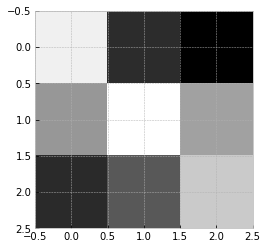

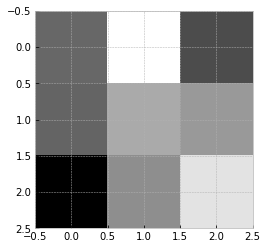

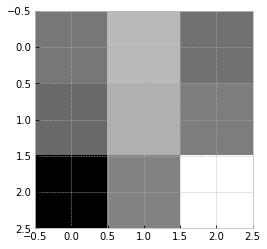

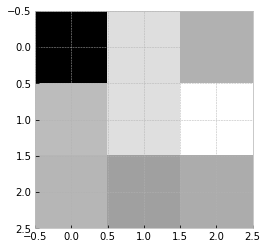

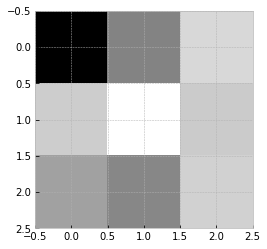

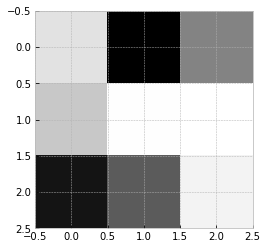

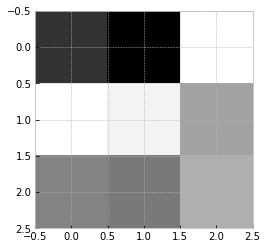

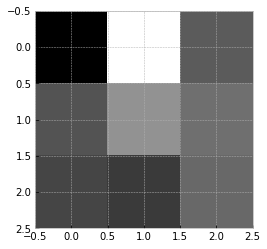

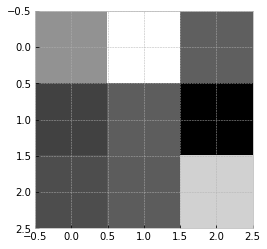

In [45]:
faces2 = pca.transform(faces_train)

f = np.where(label_train==3)[0]
for i in range(len(f)):
    plt.figure()
    plt.imshow(faces2[f[i],:].reshape((3,3)),cmap='gray')

The eigenvectors from the co-variance matrix of the zero-centred image are the eigenfaces. They represent all the significant features of a face like length of forehead, distance between eyes, length of nose / mouth and so on 

3. **Using PCA to project the data into a 2-dimensional space and plot the results. Adding comments on the separability of the classes in training.**

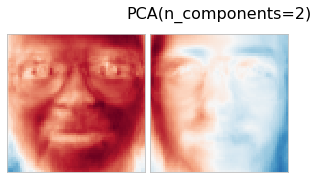

In [49]:
pca = PCA(n_components=2).fit(faces_train)
components = pca.components_
plot_gallery(PCA(n_components=2), components, cmap=plt.cm.RdBu)

In [50]:
faces3 = pca.transform(faces_train)

In [51]:
faces3.shape

(320, 2)

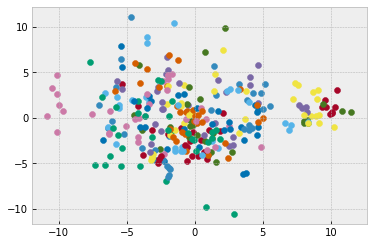

In [55]:
for i in range(40):
    j = np.where(label_train==i)[0]
    a = [x for x in faces3[j,0]]
    b = [y for y in faces3[j,1]]
    plt.scatter(a,b)

As opposed to 9 columns in the original data set, we have come down to 2 columns. This lowers the class separability.

4. **Using LDA to project the data into a 2-dimensional space and plot the results. Adding comments on the separability of the classes and comparing it with the PCA results in training.**

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
c = LinearDiscriminantAnalysis(n_components = 2)
faces_lda = c.fit_transform(faces_train,label_train)

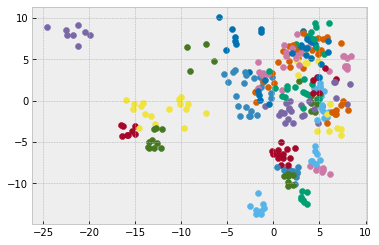

In [56]:
for i in range(40):
    j = np.where(label_train==i)[0]
    a = [x for x in faces_lda[j,0]]
    b = [y for y in faces_lda[j,1]]
    plt.scatter(a,b)

We can observe data being grouped together in the plot. We can conclude the data separability in slightly better than PCA in this case. 

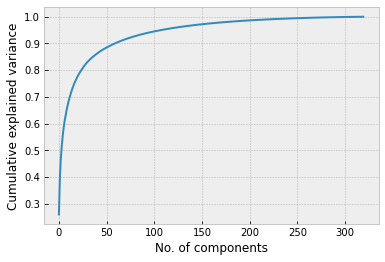

In [57]:
pca = PCA().fit(faces_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Cumulative explained variance');

In [58]:
print("Minimum number of principal components you need to preserve in order to explain at least 90% of the data = ",
      np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0])

Minimum number of principal components you need to preserve in order to explain at least 90% of the data =  59


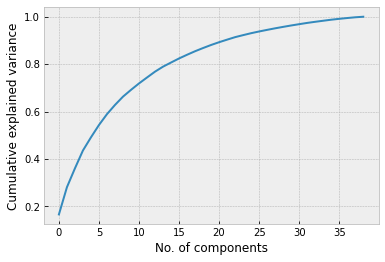

In [59]:
c = LinearDiscriminantAnalysis()
c.fit(faces_train,label_train)
plt.plot(np.cumsum(c.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Cumulative explained variance');

In [61]:
print("Minimum number of components you need to preserve in order to explain at least 90% of the data = ",
      np.where(np.cumsum(c.explained_variance_ratio_)>=0.9)[0][0])

Minimum number of components you need to preserve in order to explain at least 90% of the data =  21


In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
#from PCA
pca = PCA(n_components=59).fit(faces_train)
train_pca = pca.transform(faces_train)
test_pca = pca.transform(faces_test)
n_pca = KNeighborsClassifier(n_neighbors=3)
n_pca.fit(train_pca,label_train)
target_pca = n.predict(test_pca)
print("Accuracy for PCA = " , accuracy_score(label_test, target_pca))

Accuracy for PCA =  0.825


In [66]:
#from LDA
lda = LinearDiscriminantAnalysis(n_components = 21)
train_lda = lda.fit_transform(faces_train, label_train)
test_lda = lda.transform(faces_test)
n_lda = KNeighborsClassifier(n_neighbors=3)
n_lda.fit(train_lda,label_train)
target_lda = n_lda.predict(test_lda)
print("Accuracy for LDA = " , accuracy_score(label_test,target_lda))

Accuracy for LDA =  0.9875


Set of features from LDA performs better as confirmed by the accuracy score.